In [1]:
# main modules needed
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv('012format_last.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.rename(columns={"Unnamed: 0": "id"},inplace=True)

In [5]:
df.head()

,id,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cleaned_t = pd.read_csv('combined_ypo.csv')

In [7]:
cleaned_t.shape

(9821, 8)

In [8]:
g_plus_p=pd.merge(df,cleaned_t, left_on=df.id, right_on=cleaned_t.id, how='inner')

In [9]:
g_plus_p.shape

(8917, 35229)

In [10]:
g_plus_p.head()

,key_0,id_x,Unnamed: 0.1_x,2,3,4,5,6,7,8,...,35218,35219,Unnamed: 0,Unnamed: 0_x,id_y,yield,Unnamed: 0_y,protein,Unnamed: 0.1_y,oil
0,PI253651A,PI253651A,1,0,0,0,0,0,0,0,...,0,0,2151,3365.0,PI253651A,2.43,3365.0,42.6,3365.0,18.5
1,PI347550A,PI347550A,2,0,0,0,0,0,0,0,...,0,2,4370,6781.0,PI347550A,3.29,6781.0,44.7,6781.0,19.8
2,PI408055A,PI408055A,3,0,0,0,0,0,0,0,...,0,0,4926,7495.0,PI408055A,2.41,7495.0,46.7,7495.0,18.0
3,PI408069,PI408069,4,0,0,0,0,0,0,0,...,0,0,6399,9517.0,PI408069,NaN,9517.0,43.2,9517.0,20.6
4,PI408169A,PI408169A,5,2,2,2,0,2,0,2,...,0,0,4945,7516.0,PI408169A,1.93,7516.0,45.8,7516.0,16.4


### Mathine Learning for Protein Content

In [75]:
X=g_plus_p.iloc[:,3:35220]

In [76]:
Y=g_plus_p['protein'].fillna(np.mean(g_plus_p['protein']))

In [77]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7133, 35217) (7133,)
(1784, 35217) (1784,)


In [78]:
print('       min   max  mean   sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min   max  mean   sd
Train: 37.3 51.2 44.432359416709836 2.473454973250109
Test: 37.5 51.2 44.46987201195987 2.523973111471426


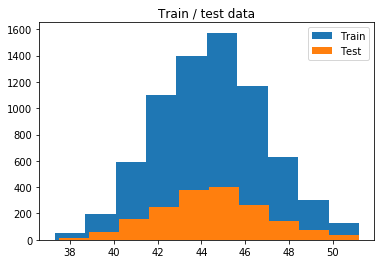

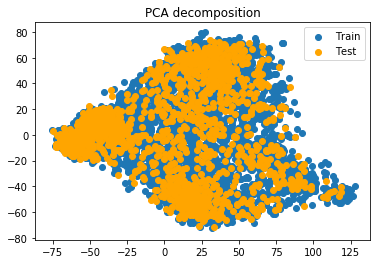

In [15]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()

# marker PCA, use whole X with diff color for train and test
X = np.concatenate((X_train, X_test))
pca = PCA(n_components=2)
p = pca.fit(X).fit_transform(X)
Ntrain=X_train.shape[0]
plt.title('PCA decomposition')
plt.scatter(p[0:Ntrain,0], p[0:Ntrain,1], label='Train')
plt.scatter(p[Ntrain:,0], p[Ntrain:,1], label='Test', color='orange')
plt.legend(loc='best')
plt.show()

In [79]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)
print(len(pvals))


35216


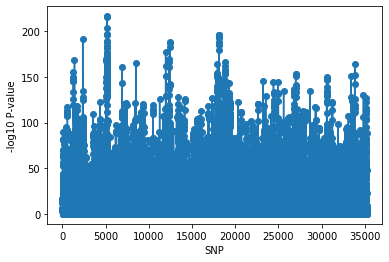

In [80]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

# select by min_P_value
min_P_value = 3 # P = 0.001
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [84]:
print(snp_list)

(array([    0,     1,     2, ..., 35211, 35212, 35215], dtype=int64),)


In [68]:
snp_list

(array([    0,     1,     2, ..., 35211, 35212, 35215], dtype=int64),)

In [69]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Create the hyperparameter grid
a = np.linspace(0, 1, 20)
param_grid = {'alpha': a}

# Instantiate the ElasticNet regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet alpha: {'alpha': 0.05263157894736842}
Tuned ElasticNet R squared: 0.38253214129744284
Tuned ElasticNet MSE: 3.946885986841166



MSE in prediction = 3.757598464194162

Corr obs vs pred = 0.6443152090458819


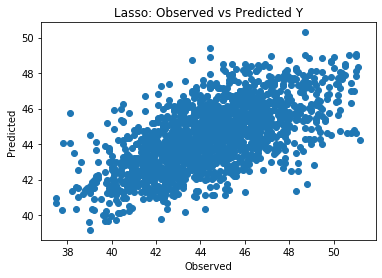

In [86]:
import sklearn.metrics as sm
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.052)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


### Mathine Learning for Oil Content

In [41]:
X=g_plus_p.iloc[:,3:35220]

In [42]:
Y=g_plus_p['oil'].fillna(np.mean(g_plus_p['oil']))

In [43]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7133, 35217) (7133,)
(1784, 35217) (1784,)


In [44]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 13.0 24.0 18.383603791917114 1.9774212589601872
Test: 13.0 24.1 18.43310482992577 1.9390334718213342


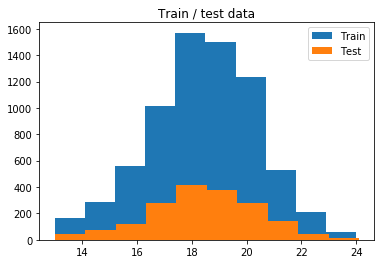

In [45]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()


In [46]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

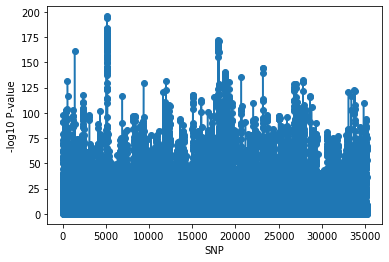

In [47]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()


#  select by min_P_value
min_P_value = 3 # P = 0.01
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [50]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## First round, I tried the  np.linspace(0, 1, 30), I found thar 0.037 is the best alpha,
## however, 0.037 was the second value to 0, so it's nessary to try value between 0 and 0.037.
# Create the hyperparameter grid
a = np.linspace(0, 0.037, 10)
param_grid = {'alpha': a}

# Instantiate the ElasticNet regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'alpha': 0.024666666666666663}
Tuned ElasticNet R squared: 0.40864752013114614
Tuned ElasticNet MSE: 2.213893660528818



MSE in prediction = 2.2115077912050003

Corr obs vs pred = 0.6406115315720268


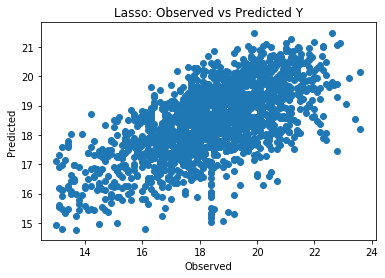

In [51]:
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.025)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


## Mathine Learning for Yield

In [52]:
X=g_plus_p.iloc[:,3:35220]

In [53]:
Y=g_plus_p['yield'].fillna(np.mean(g_plus_p['yield']))

In [54]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7133, 35217) (7133,)
(1784, 35217) (1784,)


In [55]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 0.03 4.803 1.9930552777295667 0.7003781348679853
Test: 0.06 4.842 1.9772983145853869 0.6734894619024506


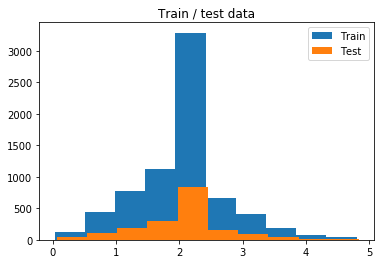

In [56]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()



In [57]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

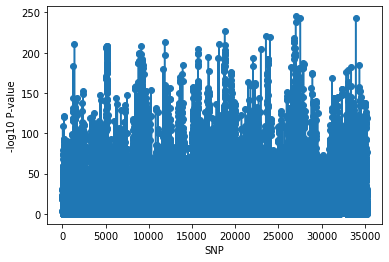

In [58]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()


# select by min_P_value
min_P_value = 3 # P = 0.001
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [59]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Create the hyperparameter grid
a = np.linspace(0, 0.037, 10)
param_grid = {'alpha': a}

# Instantiate the ElasticNet regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'alpha': 0.008222222222222221}
Tuned ElasticNet R squared: 0.5098105223377667
Tuned ElasticNet MSE: 0.252433890130012



MSE in prediction = 0.25239926606696184

Corr obs vs pred = 0.7184356916821806


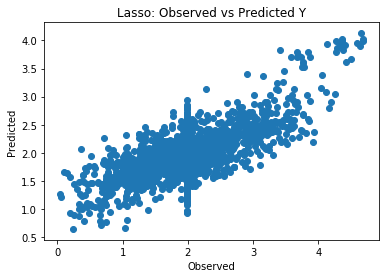

In [61]:
## Use the best parameter from the above grid-search, namely: 'alpha'= 0.008222
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.0082)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()
